# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Загрузим необходимые библиотеки (список будет пополняться в ходе выполнения проекта):

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

Загрузим файлы и выведем первые строки на экран:

In [2]:
#открываем файлы
df1 = pd.read_csv("C:\\Users\\Bogdanova\\Downloads\\geo_data_0.csv")
df2 = pd.read_csv("C:\\Users\\Bogdanova\\Downloads\\geo_data_1.csv")
df3 = pd.read_csv("C:\\Users\\Bogdanova\\Downloads\\geo_data_2.csv")

In [3]:
#выводим файлы на экран
for n in df1, df2, df3:
    display(n.head(10))


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


Просмотрим информацию о файлах:

In [4]:
for n in df1, df2, df3:
    display(n.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Пропуски в данных отсутсвуют. Проверим данные на наличие янвых дубликатов:

In [5]:
for n in df1, df2, df3: 
        print('Количество явных дубликатов региона:', n.duplicated().sum())

Количество явных дубликатов региона: 0
Количество явных дубликатов региона: 0
Количество явных дубликатов региона: 0


In [6]:
#print('Количество явных дубликатов первого региона:', df1.duplicated().sum())

In [7]:
#print('Количество явных дубликатов второго региона:', df2.duplicated().sum())

In [8]:
#print('Количество явных дубликатов третьего региона:', df2.duplicated().sum())

Явных дубликатов не обнаружено. Проверим данные на неявные дубликаты по столбцу с уникальными значениями:

In [9]:
#выведем id номера
for n in df1, df2, df3: 
    display(n[n['id'].isin(n['id'][n['id'].duplicated()])].sort_values('id'))

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


Выявлены уникальные идентификаторы скважины по каждому региону, но т.к. f0, f1, f2 — важные признаки и они не задваиваются, оставим данные строки.

Рассмотрим распределение данных:

**Регион 1**

In [10]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


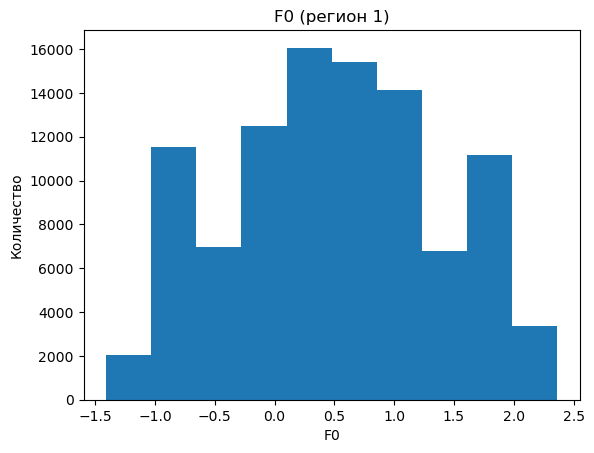

In [11]:
plt.hist(df1.f0)
plt.xlabel('F0');
plt.ylabel('Количество');
plt.title('F0 (регион 1)');

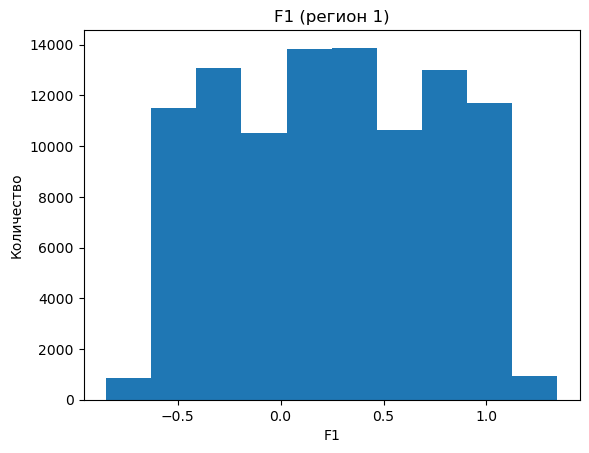

In [12]:
plt.hist(df1.f1)
plt.xlabel('F1');
plt.ylabel('Количество');
plt.title('F1 (регион 1)');

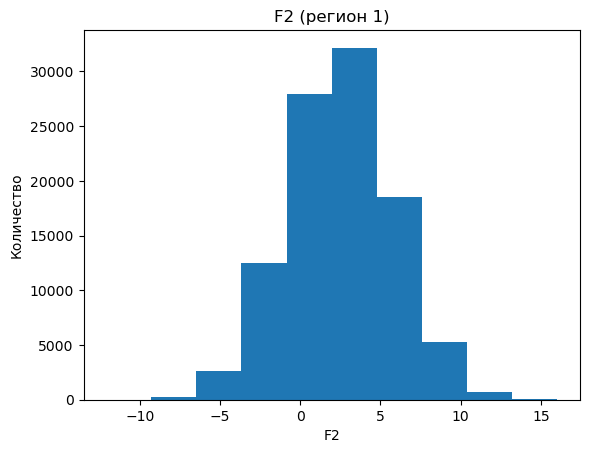

In [13]:
plt.hist(df1.f2)
plt.xlabel('F2');
plt.ylabel('Количество');
plt.title('F2 (регион 1)');

Данные по региону 1 имеют форму близкую к нормальному распределению. Среднее и медиана близки по значениям.

**Регион 2:**

In [14]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


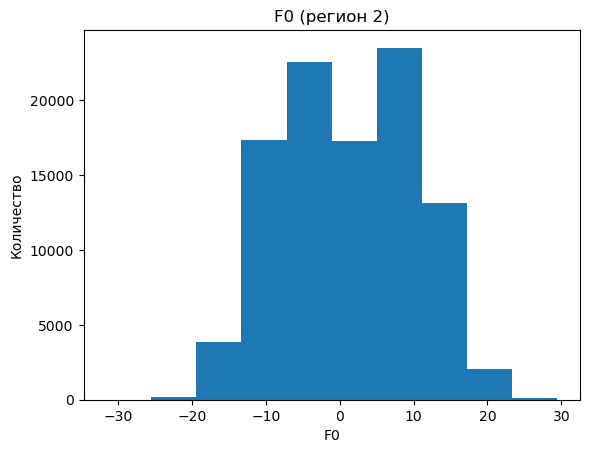

In [15]:
plt.hist(df2.f0)
plt.xlabel('F0');
plt.ylabel('Количество');
plt.title('F0 (регион 2)');

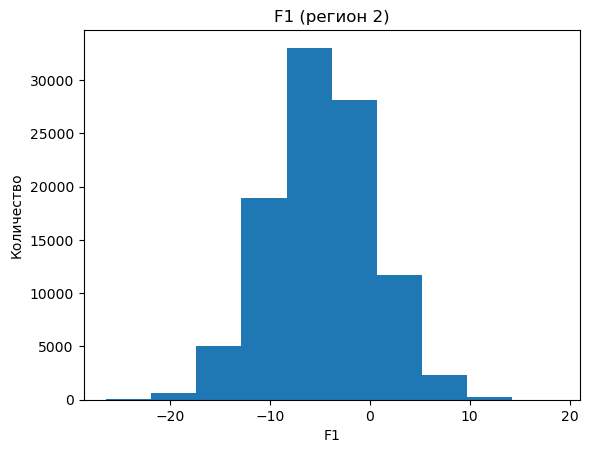

In [16]:
plt.hist(df2.f1)
plt.xlabel('F1');
plt.ylabel('Количество');
plt.title('F1 (регион 2)');

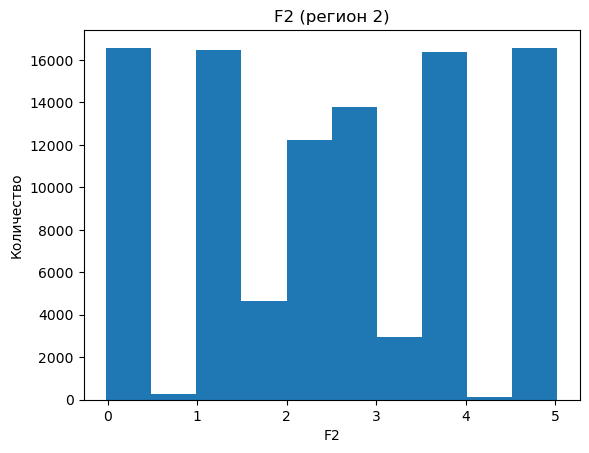

In [17]:
plt.hist(df2.f2)
plt.xlabel('F2');
plt.ylabel('Количество');
plt.title('F2 (регион 2)');

Данные F0, F1 по региону 2 имеют форму близкую к нормальному распределению.

Данные F2 по региону 2 распределены не нормально.

**Регион 3:**

In [18]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


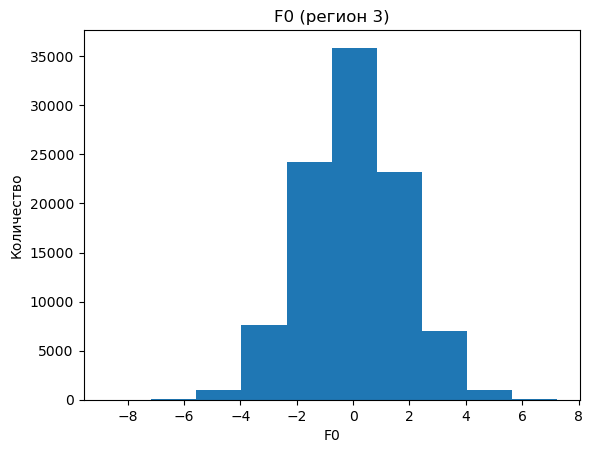

In [19]:
plt.hist(df3.f0)
plt.xlabel('F0');
plt.ylabel('Количество');
plt.title('F0 (регион 3)');

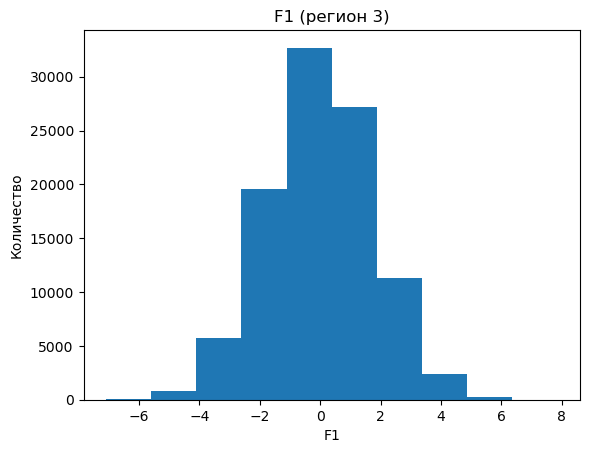

In [20]:
plt.hist(df3.f1)
plt.xlabel('F1');
plt.ylabel('Количество');
plt.title('F1 (регион 3)');

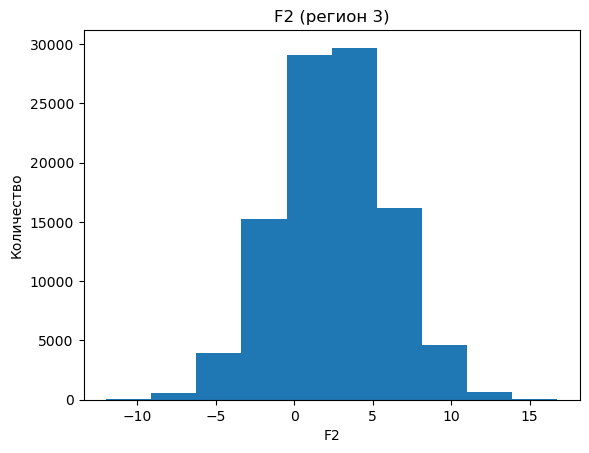

In [21]:
plt.hist(df3.f2)
plt.xlabel('F2');
plt.ylabel('Количество');
plt.title('F2 (регион 3)');

Данные по региону 3 имеют форму близкую к нормальному распределению.

**Рассмотрим зависимость объёма запасов в скважине от параметров f0, f1, f2**

**Регион 1**

In [22]:
df1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


**Регион 2**

In [23]:
df2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


**Регион 3**

In [24]:
df3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


В регионе 2 выявлена сильная корреляционная зависимость между параметром f2 и показателем product.

**Выводы:**

- Проведен анализ данных по всем выборкам. Пропусков не обнаружено, явные и неявные дубликаты не обнаружены;
- Произведен анализ распределения данных по регионам. По региону 2 значения параметра f2 распределены ненормально, при этом выявлена сильная корреляционная зависимость между параметром f2 и показателем product.

## Обучение и проверка модели

Проведем обучение моделей по регионам.

**Регион 1**

Удалим ненужные при обучении модели столбцы:

In [25]:
df1 = df1.drop('id', axis = 1)

Выполним извлечение признаков и целевых признаков:

In [26]:
#извлекаем признаки
features1 = df1.drop(['product'],axis=1)
#извлекаем целевые признаки
target1 = df1['product']

Разделим исходные данные на обучающую и валидационную выборки в соотношении 75:25:

In [27]:
features1_train, features1_valid, target1_train, target1_valid = train_test_split(
    features1, target1, test_size=0.25, random_state=12345
)

Проверим размеры выборок:

In [28]:
print('Размер обучающей выборки:', len(features1_train))
print('Размер валидационной выборки:',len(features1_valid))

Размер обучающей выборки: 75000
Размер валидационной выборки: 25000


Стандартизируем тестовую и валидационную выборку:

In [29]:
scaler1 = StandardScaler()
scaler1.fit(features1_train)
features1_train_st = scaler1.transform(features1_train)
features1_valid_st = scaler1.transform(features1_valid)

Согласно заданию для обучения модели подходит только линейная регрессия:

In [30]:
model_1 = LinearRegression()
model_1.fit(features1_train_st, target1_train)
predictions1_valid = model_1.predict(features1_valid_st)
#считаем метрику rmse
result1 = mean_squared_error(target1_valid, predictions1_valid)**0.5
#средний запас предсказанного сырья 
reserve1 = predictions1_valid.mean()
print("RMSE модели:", result1)
print("Средний запас предсказанного сырья:", reserve1)

RMSE модели: 37.5794217150813
Средний запас предсказанного сырья: 92.59256778438035


**Регион 2**

Удалим ненужные при обучении модели столбцы:

In [31]:
df2 = df2.drop('id', axis = 1)

Выполним извлечение признаков и целевых признаков:

In [32]:
#извлекаем признаки
features2 = df2.drop(['product'],axis=1)
#извлекаем целевые признаки
target2 = df2['product']

Разделим исходные данные на обучающую и валидационную выборки в соотношении 75:25:

In [33]:
features2_train, features2_valid, target2_train, target2_valid = train_test_split(
    features2, target2, test_size=0.25, random_state=12345
)

Проверим размеры выборок:

In [34]:
print('Размер обучающей выборки:', len(features2_train))
print('Размер валидационной выборки:',len(features2_valid))

Размер обучающей выборки: 75000
Размер валидационной выборки: 25000


Стандартизируем тестовую и валидационную выборку:

In [35]:
scaler2 = StandardScaler()
scaler2.fit(features1_train)
features2_train_st = scaler2.transform(features2_train)
features2_valid_st = scaler2.transform(features2_valid)

Согласно заданию для обучения модели подходит только линейная регрессия:

In [36]:
model_2 = LinearRegression()
model_2.fit(features2_train_st, target2_train)
predictions2_valid = model_2.predict(features2_valid_st)
#считаем метрику rmse
result2 = mean_squared_error(target2_valid, predictions2_valid)**0.5
#средний запас предсказанного сырья 
reserve2 = predictions2_valid.mean()
print("RMSE модели:", result2)
print("Средний запас предсказанного сырья:", reserve2)

RMSE модели: 0.8930992867756168
Средний запас предсказанного сырья: 68.728546895446


**Регион 3**

Удалим ненужные при обучении модели столбцы:

In [37]:
df3 = df3.drop('id', axis = 1)

Выполним извлечение признаков и целевых признаков:

In [38]:
#извлекаем признаки
features3 = df3.drop(['product'],axis=1)
#извлекаем целевые признаки
target3 = df3['product']

Разделим исходные данные на обучающую и валидационную выборки в соотношении 75:25:

In [39]:
features3_train, features3_valid, target3_train, target3_valid = train_test_split(
    features3, target3, test_size=0.25, random_state=12345
)

Проверим размеры выборок:

In [40]:
print('Размер обучающей выборки:', len(features3_train))
print('Размер валидационной выборки:',len(features3_valid))

Размер обучающей выборки: 75000
Размер валидационной выборки: 25000


Стандартизируем тестовую и валидационную выборку:

In [41]:
scaler3 = StandardScaler()
scaler3.fit(features3_train)
features3_train_st = scaler3.transform(features3_train)
features3_valid_st = scaler3.transform(features3_valid)

Согласно заданию для обучения модели подходит только линейная регрессия:

In [42]:
model_3 = LinearRegression()
model_3.fit(features3_train_st, target3_train)
predictions3_valid = model_3.predict(features3_valid_st)
#считаем метрику rmse
result3 = mean_squared_error(target3_valid, predictions3_valid)**0.5
#средний запас предсказанного сырья 
reserve3 = predictions3_valid.mean()
print("RMSE модели:", result3)
print("Средний запас предсказанного сырья:", reserve3)

RMSE модели: 40.02970873393434
Средний запас предсказанного сырья: 94.96504596800489


**Вывод:** 

- для обучения моделей применена модель линейной регрессии;
- результаты по первому и третьему региону схожи RMSE модели близок к значению 40, средний запас предсказанного сырья в пределах 92-94;
- самый лучший коэффциент RMSE у второго региона, но при этом самый низкий средний запас предсказанного сырья.

## Подготовка к расчёту прибыли

Для расчётов сохраним ключевые значения в отдельных переменных:

In [43]:
BUDGET = 10000000000
MAX_BOREHOLES = 500
BEST_BOREHOLES = 200
REVENUE_BARREL = 450000
LOSSES = 0.025

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины:

In [44]:
#определим точку безубыточности по региону
break_even_point = BUDGET / REVENUE_BARREL
#определим достаточный объём сырья для безубыточной разработки новой скважины
break_even_volume = break_even_point / BEST_BOREHOLES
print('Точка безубыточности по региону:', break_even_point)
print('Достаточный объём сырья для безубыточной разработки новой скважины:', break_even_volume)

Точка безубыточности по региону: 22222.222222222223
Достаточный объём сырья для безубыточной разработки новой скважины: 111.11111111111111


**Вывод:** средний запас сырья в скважинах ниже, чем достаточный объём сырья для безубыточной разработки новой скважины.

Рассмотрим запас сырья в скважинах по квантилям:

In [45]:
product_describe = df1['product'].describe().to_frame().join(df2['product'].describe().to_frame(), rsuffix="2")\
.join(df3['product'].describe().to_frame(), rsuffix="3")
print(product_describe)

             product       product2       product3
count  100000.000000  100000.000000  100000.000000
mean       92.500000      68.825000      95.000000
std        44.288691      45.944423      44.749921
min         0.000000       0.000000       0.000000
25%        56.497507      26.953261      59.450441
50%        91.849972      57.085625      94.925613
75%       128.564089     107.813044     130.595027
max       185.364347     137.945408     190.029838


**Вывод:** в регионе 1 и 3 около 25% скважин входят в интервал безубыточности, в регионе 2 данное значение менее 25%.

## Расчёт прибыли и рисков 

Согласно заданию региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки. Константу 200 мы зафиксировали ранее в переменной BEST_BOREHOLES. Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям и рассчитаем прибыль для полученного объёма сырья:

In [46]:
def revenue(target, predict):
    target_best = (target.reset_index(drop = True)[pd.Series(predict).sort_values(ascending=False)[:BEST_BOREHOLES].index])
    target_sum = target_best.sum()
    return (target_sum * REVENUE_BARREL) - BUDGET

print('Прибыль для полученного объёма сырья в первом регионе:', revenue(target1_valid, predictions1_valid))
print('Прибыль для полученного объёма сырья во втором регионе:', revenue(target2_valid, predictions2_valid))
print('Прибыль для полученного объёма сырья в третьем регионе:', revenue(target3_valid, predictions3_valid))

Прибыль для полученного объёма сырья в первом регионе: 3320826043.1398506
Прибыль для полученного объёма сырья во втором регионе: 2415086696.681511
Прибыль для полученного объёма сырья в третьем регионе: 2710349963.5998325


Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли. Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков:

In [47]:
def interval(target, predict, n):
    subsamples = []
    state = np.random.RandomState(12345)
    for i in range(1000):
        subsample = pd.Series(predict).sample(n = MAX_BOREHOLES, replace=True, random_state = state)
        subsamples.append(revenue(target, subsample))
    subsamples = pd.Series(subsamples)
    print('Средняя прибыль лучших для разработки скважин региона', n, '-', round(subsamples.mean(), 2))
    print('Риск убытков региона', n, '-', len(subsamples[subsamples < 0]) / len(subsamples)*100,'%')
    
    lower = subsamples.quantile(LOSSES)
    upper = subsamples.quantile(1-LOSSES)
    return lower, upper
print('95%-й доверительный итервал для региона 1 лучших для разработки скважин лежит между:',
      interval(target1_valid, predictions1_valid, 1), '\n')

print('95%-й доверительный итервал для региона 2 лучших для разработки скважин лежит между:',
      interval(target2_valid, predictions2_valid, 2), '\n')

print('95%-й доверительный итервал для региона 3 лучших для разработки скважин лежит между:',
      interval(target3_valid, predictions3_valid, 3))

Средняя прибыль лучших для разработки скважин региона 1 - 396164984.8
Риск убытков региона 1 - 6.9 %
95%-й доверительный итервал для региона 1 лучших для разработки скважин лежит между: (-111215545.89049526, 909766941.5534226) 

Средняя прибыль лучших для разработки скважин региона 2 - 456045105.79
Риск убытков региона 2 - 1.5 %
95%-й доверительный итервал для региона 2 лучших для разработки скважин лежит между: (33820509.39898363, 852289453.866036) 

Средняя прибыль лучших для разработки скважин региона 3 - 404403866.57
Риск убытков региона 3 - 7.6 %
95%-й доверительный итервал для региона 3 лучших для разработки скважин лежит между: (-163350413.39560106, 950359574.9237995)


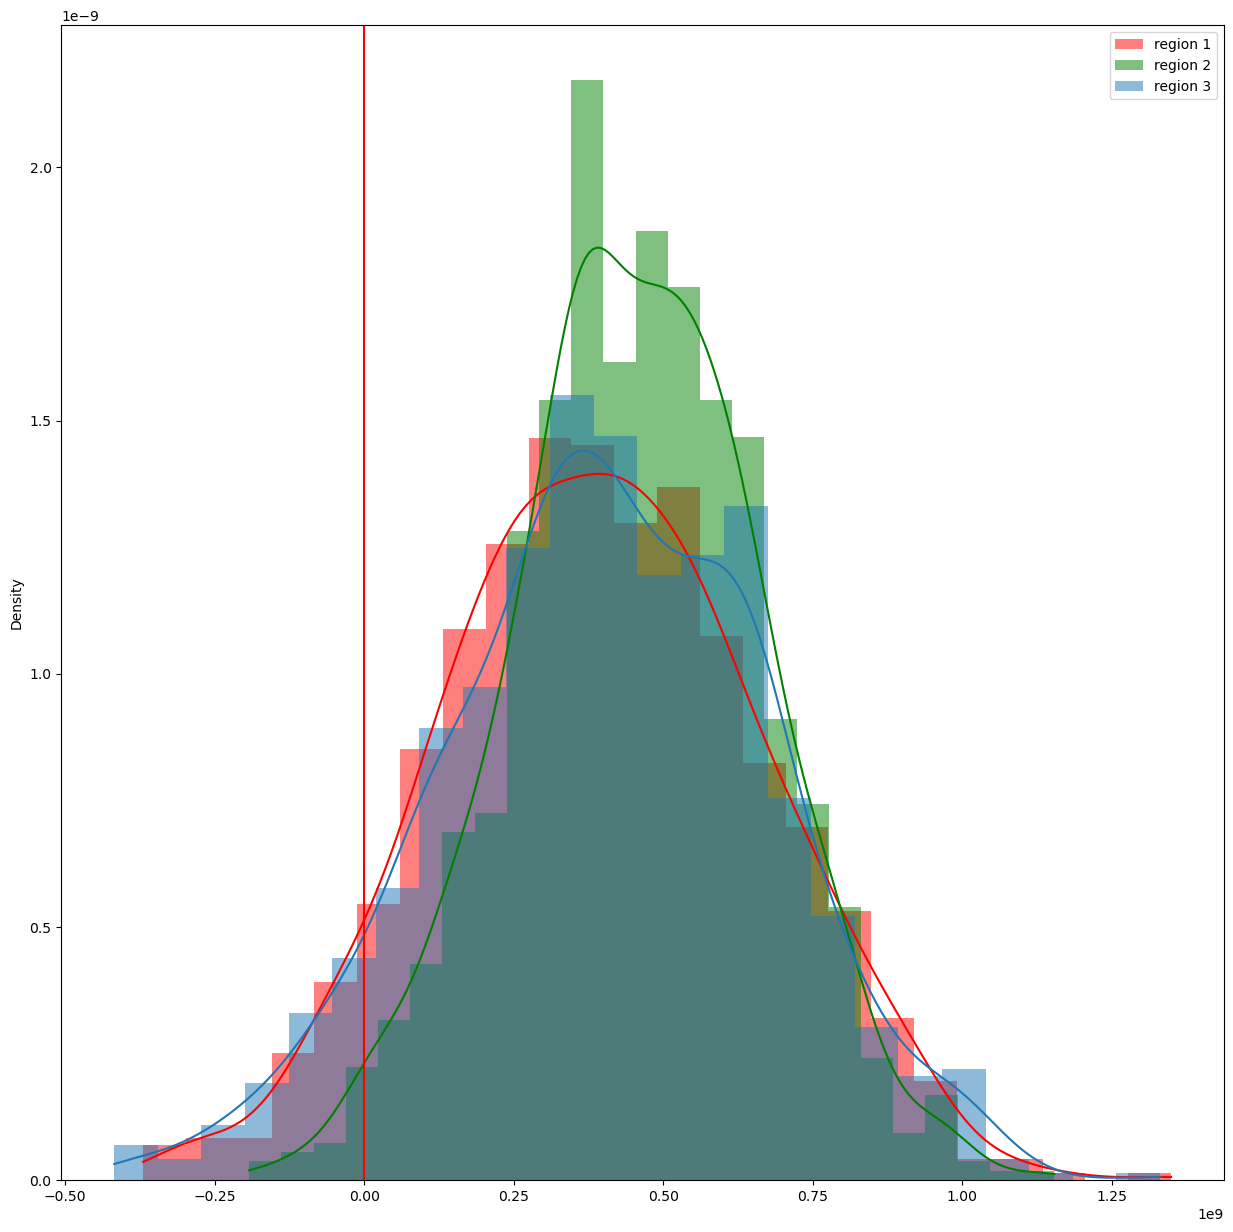

In [48]:
def distribution(target, predict):
    subsamples = []
    state = np.random.RandomState(12345)
    for i in range(1000):
        subsample = pd.Series(predict).sample(n = MAX_BOREHOLES, replace=True, random_state = state)
        subsamples.append(revenue(target, subsample))
    return pd.Series(subsamples)
distribution1 = distribution(target1_valid, predictions1_valid)
distribution2 = distribution(target2_valid, predictions2_valid)
distribution3 = distribution(target3_valid, predictions3_valid)
plt.subplots(figsize=(15,15))
sns.histplot(distribution1, label="region 1", kde=True, stat="density", linewidth=0, color = 'red')
sns.histplot(distribution2, label="region 2", kde=True, stat="density", linewidth=0, color = 'green')
sns.histplot(distribution3, label="region 3", kde=True, stat="density", linewidth=0)
plt.axvline(0, c="r", label="");
plt.legend();

**Выводы:**


- согласно заданию вероятность убытков меньше 2.5% (переменная LOSSES). Данному критерию соответствует регион 2 - 1.5%;
- лучшая средняя прибыль для разработки скважин у региона 2 - 456 045 105.79;
- 95%-й доверительный интервал для региона 2 лежит в позитивном поле: 33 820 509.40 - 852 289 453.87;
- на основе вышеизложенного предполагаемый регион для разработки скважин - 2, т.к. по данному региону наименьшая вероятность убытков, лучшая средняя прибыль для разработки скважин, 95%-й доверительный интервал лежит в позитивном поле, самый лучший коэффциент RMSE.
